In [1]:
# Change directory to the root folder of the repository
import os
os.chdir("../../")

In [2]:
# This is the directory where those files are downloaded to
data_dir = "/corgi/filippe/libsall/AGG1/outs"

In [3]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad

In [4]:
import muon as mu

In [86]:
mdata = mu.read_10x_h5(os.path.join(data_dir, "filtered_feature_bc_matrix.h5"))
mdata.var_names_make_unique()
mdata # seems to work

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Added `interval` annotation for features from /corgi/filippe/libsall/AGG1/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Added peak annotation from /corgi/filippe/libsall/AGG1/outs/atac_peak_annotation.tsv to .uns['atac']['peak_annotation']
Added gene names to peak annotation in .uns['atac']['peak_annotation']
Located fragments file: /corgi/filippe/libsall/AGG1/outs/atac_fragments.tsv.gz


MuData object with n_obs × n_vars = 11770 × 152202
  var:	'feature_types', 'gene_ids', 'genome', 'interval'
  2 modalities
    rna:	11770 x 36601
      var:	'gene_ids', 'feature_types', 'genome', 'interval'
    atac:	11770 x 115601
      var:	'gene_ids', 'feature_types', 'genome', 'interval'
      uns:	'atac', 'files'

In [18]:
mdata

MuData object with n_obs × n_vars = 11770 × 152202
  var:	'feature_types', 'gene_ids', 'genome', 'interval'
  2 modalities
    rna:	11770 x 36601
      var:	'gene_ids', 'feature_types', 'genome', 'interval'
    atac:	11770 x 115601
      var:	'gene_ids', 'feature_types', 'genome', 'interval'
      uns:	'atac', 'files'

In [10]:
mdata.var

,feature_types,gene_ids,genome,interval
MIR1302-2HG,Gene Expression,ENSG00000243485,GRCh38,chr1:29553-30267
FAM138A,Gene Expression,ENSG00000237613,GRCh38,chr1:36080-36081
OR4F5,Gene Expression,ENSG00000186092,GRCh38,chr1:65418-69055
AL627309.1,Gene Expression,ENSG00000238009,GRCh38,chr1:120931-133723
AL627309.3,Gene Expression,ENSG00000239945,GRCh38,chr1:91104-91105
...,...,...,...,...
KI270711.1:22576-23421,Peaks,KI270711.1:22576-23421,GRCh38,KI270711.1:22576-23421
KI270713.1:3917-4818,Peaks,KI270713.1:3917-4818,GRCh38,KI270713.1:3917-4818
KI270713.1:21430-22329,Peaks,KI270713.1:21430-22329,GRCh38,KI270713.1:21430-22329
KI270713.1:29673-30443,Peaks,KI270713.1:29673-30443,GRCh38,KI270713.1:29673-30443


In [11]:
mdata.obs

""
AAACAGCCAAGATTCT-3
AAACAGCCAATATACC-3
AAACAGCCAGTACCGT-3
AAACAGCCATTGTGGC-1
AAACATGCAACGTGCT-4
...
TTTGTGTTCGCTAGAT-4
TTTGTTGGTAACCTAG-3
TTTGTTGGTCGCAATA-3
TTTGTTGGTGGGAACA-2


In [12]:
mdata.obs_names

Index(['AAACAGCCAAGATTCT-3', 'AAACAGCCAATATACC-3', 'AAACAGCCAGTACCGT-3',
       'AAACAGCCATTGTGGC-1', 'AAACATGCAACGTGCT-4', 'AAACATGCAATGAAGC-1',
       'AAACATGCAATGAAGC-4', 'AAACATGCACAGCCAT-4', 'AAACATGCACCTGCCT-4',
       'AAACATGCAGCAACAG-3',
       ...
       'TTTGTGGCATGTCAGC-1', 'TTTGTGTTCATGGCCA-1', 'TTTGTGTTCATGGTTA-4',
       'TTTGTGTTCCTCACTA-4', 'TTTGTGTTCGCTAAAC-1', 'TTTGTGTTCGCTAGAT-4',
       'TTTGTTGGTAACCTAG-3', 'TTTGTTGGTCGCAATA-3', 'TTTGTTGGTGGGAACA-2',
       'TTTGTTGGTTGGATAT-4'],
      dtype='object', length=11770)

In [13]:
mdata.obs_names[0][-1]

'3'

In [14]:
mdata.obs_names[11769] # should be possible to make batch id

'TTTGTTGGTTGGATAT-4'

In [15]:
len(mdata.obs_names)

11770

In [16]:
# roughly how to add new batch key:  

batchlist = []

for i in mdata.obs_names: 
    batchlist.append(i[-1])
    
print(len(batchlist))

11770


In [26]:
# how to add the batch id: 
# mdata.obs['batch'] = batchlist

""
AAACAGCCAAGATTCT-3
AAACAGCCAATATACC-3
AAACAGCCAGTACCGT-3
AAACAGCCATTGTGGC-1
AAACATGCAACGTGCT-4
...
TTTGTGTTCGCTAGAT-4
TTTGTTGGTAACCTAG-3
TTTGTTGGTCGCAATA-3
TTTGTTGGTGGGAACA-2


In [34]:
# mdata['rna'].X is a matrix

<11770x36601 sparse matrix of type '<class 'numpy.float32'>'
	with 19002415 stored elements in Compressed Sparse Row format>

In [35]:
# should probably save the mdata object: 
#mdata.write("/corgi/filippe/mudatas/mltomebcells.h5mu") # done

... storing 'feature_types' as categorical
... storing 'genome' as categorical
... storing 'interval' as categorical
... storing 'feature_types' as categorical
... storing 'genome' as categorical
... storing 'interval' as categorical
... storing 'feature_types' as categorical
... storing 'genome' as categorical


In [ ]:
# now repeat tutorials for this data: 

In [ ]:
# preprocessing of rna data: 

In [19]:
rna = mdata.mod['rna']
rna

AnnData object with n_obs × n_vars = 11770 × 36601
    var: 'gene_ids', 'feature_types', 'genome', 'interval'

In [ ]:
# doing the same steps as with only scRNA b cell data:

In [ ]:
# ignoring this step: 
############ add telomers   TODO               move to henlab common
#import math
#import numpy as np
#cellname = [y+"#"+x[0:18] for (x,y) in zip(adata.obs["cellbc"],adata.obs["batchname"])]
#df = pd.read_csv("/corgi/cellbuster/bigb/summary_kmer.csv")
#df.set_axis(['cellbc', 'count','total'], axis=1, inplace=True)
#d = dict(zip(df["cellbc"],df["count"]))
#adata.obs["cnt_telo"] = [d[cn] if cn in d else math.nan for cn in cellname]

#d = dict(zip(df["cellbc"],df["total"]))
#adata.obs["cnt_atac"] = [d[cn] if cn in d else math.nan for cn in cellname]

#adata = adata[~np.isnan(adata.obs["cnt_telo"]),:]

In [20]:
sc.pp.filter_cells(rna, min_genes=20)  #lower than usual
sc.pp.filter_genes(rna, min_cells=3)

In [21]:
rna.var['mt'] = rna.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(rna, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

... storing 'feature_types' as categorical
... storing 'genome' as categorical
... storing 'interval' as categorical


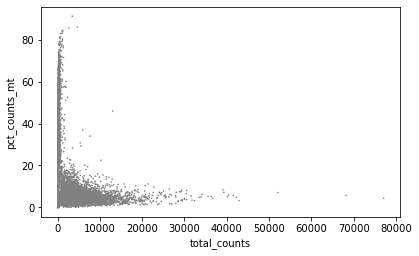

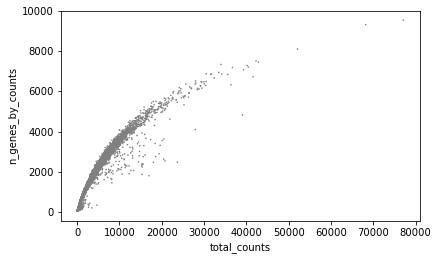

In [22]:
sc.pl.scatter(rna, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(rna, x='total_counts', y='n_genes_by_counts')

In [23]:
rna = rna[rna.obs.pct_counts_mt < 25, :]    # a good number!
rna = rna[rna.obs.n_genes_by_counts < 8000, :]
rna

View of AnnData object with n_obs × n_vars = 10153 × 25577
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [25]:
# filtering should be done!
sc.pp.normalize_total(rna)
sc.pp.log1p(rna)

/home/mahogny/miniconda3_38/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [30]:
# create batchlist for partly preprocessed rna adata: 
batchlist = []

for i in rna.obs_names: 
    batchlist.append(i[-1])
    
print(len(batchlist))

10153


In [28]:
#batchlist

In [31]:
#Adding 'batchname' for consistency: 

rna.obs['batchname'] = batchlist

In [32]:
rna.obs # seems successful

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,batchname
AAACAGCCAAGATTCT-3,3601,3601,17367.0,399.0,2.297461,3
AAACAGCCAATATACC-3,1529,1529,2957.0,192.0,6.493067,3
AAACAGCCAGTACCGT-3,2004,2001,3741.0,192.0,5.132318,3
AAACAGCCATTGTGGC-1,3931,3928,15317.0,597.0,3.897630,1
AAACATGCAACGTGCT-4,1283,1283,2135.0,93.0,4.355972,4
...,...,...,...,...,...,...
TTTGTGTTCGCTAAAC-1,1467,1467,2805.0,214.0,7.629233,1
TTTGTGTTCGCTAGAT-4,1381,1381,2590.0,150.0,5.791506,4
TTTGTTGGTAACCTAG-3,2035,2034,4144.0,139.0,3.354247,3
TTTGTTGGTCGCAATA-3,1897,1895,3836.0,87.0,2.267987,3


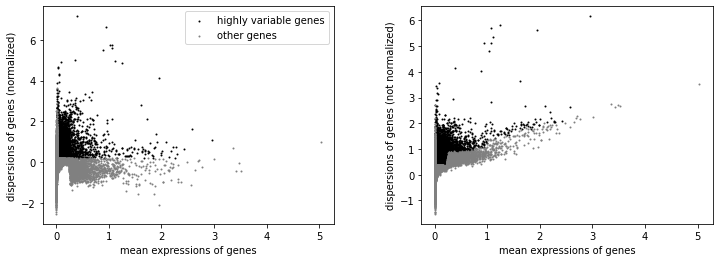

In [34]:
# may need to add batchname
sc.pp.highly_variable_genes(rna, min_mean=0.0125, max_mean=3, min_disp=0.2, batch_key="batchname")
sc.pl.highly_variable_genes(rna)

In [35]:
# if cellcycle annontations is to be added: 
import sys
import importlib
sys.path.append('/corgi/cellbuster/py')
import henlab_common 

In [36]:
# add cellcycle annontations:  
rna = henlab_common.annotate_cellcycle_human(rna)

In [38]:
rna.obs # successful?

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,batchname,S_score,G2M_score,phase,cellcycle
AAACAGCCAAGATTCT-3,3601,3601,17367.0,399.0,2.297461,3,-0.049390,-0.002261,G1,G1
AAACAGCCAATATACC-3,1529,1529,2957.0,192.0,6.493067,3,-0.024301,-0.044077,G1,G1
AAACAGCCAGTACCGT-3,2004,2001,3741.0,192.0,5.132318,3,0.039835,-0.047578,S,S
AAACAGCCATTGTGGC-1,3931,3928,15317.0,597.0,3.897630,1,-0.060403,-0.014649,G1,G1
AAACATGCAACGTGCT-4,1283,1283,2135.0,93.0,4.355972,4,0.017995,-0.001864,S,S
...,...,...,...,...,...,...,...,...,...,...
TTTGTGTTCGCTAAAC-1,1467,1467,2805.0,214.0,7.629233,1,-0.026132,-0.000889,G1,G1
TTTGTGTTCGCTAGAT-4,1381,1381,2590.0,150.0,5.791506,4,-0.021209,-0.030474,G1,G1
TTTGTTGGTAACCTAG-3,2035,2034,4144.0,139.0,3.354247,3,-0.058964,0.044091,G2M,G2M
TTTGTTGGTCGCAATA-3,1897,1895,3836.0,87.0,2.267987,3,-0.061067,-0.071183,G1,G1


In [39]:
#Keep raw data; reduce matrix
rna.raw = rna
rna = rna[:, rna.var.highly_variable]

In [42]:
#Take care of batch effects (somewhat)
#sc.pp.regress_out(adata, ["tech"]) 
#sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt']) # this is super slow 2 min and 48 sec
sc.pp.scale(rna, max_value=10)

In [43]:
rna

AnnData object with n_obs × n_vars = 10153 × 7166
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batchname', 'S_score', 'G2M_score', 'phase', 'cellcycle'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'log1p', 'hvg'

In [45]:
sc.tl.pca(rna, svd_solver='arpack')
if True:
    import bbknn
    bbknn.bbknn(rna, batch_key='batchname')
else:
    sc.pp.neighbors(rna, n_neighbors=10, n_pcs=40)
sc.tl.umap(rna)

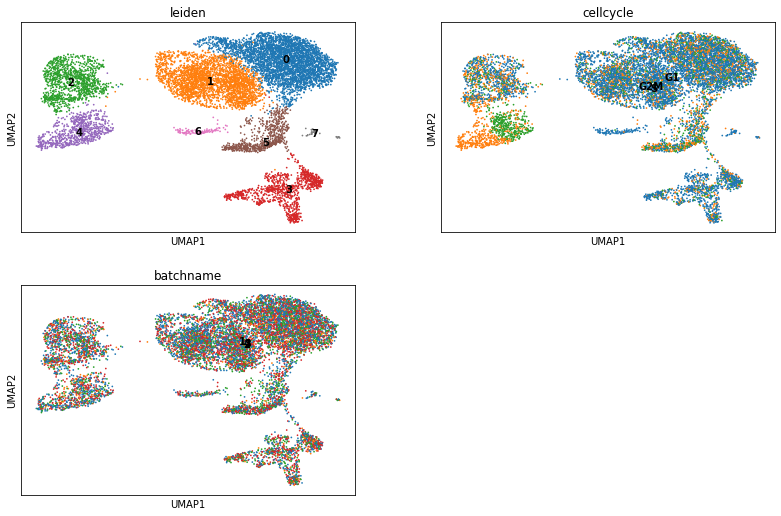

In [48]:
# regresses out dataset:
#sc.tl.leiden(adata, resolution=0.2)  #to get the big groups
sc.tl.leiden(rna, resolution=0.25) # seems resolution 0.25 is good for replicating results!
sc.pl.umap(rna,color=["leiden","cellcycle","batchname"],ncols=2,legend_loc="on data")

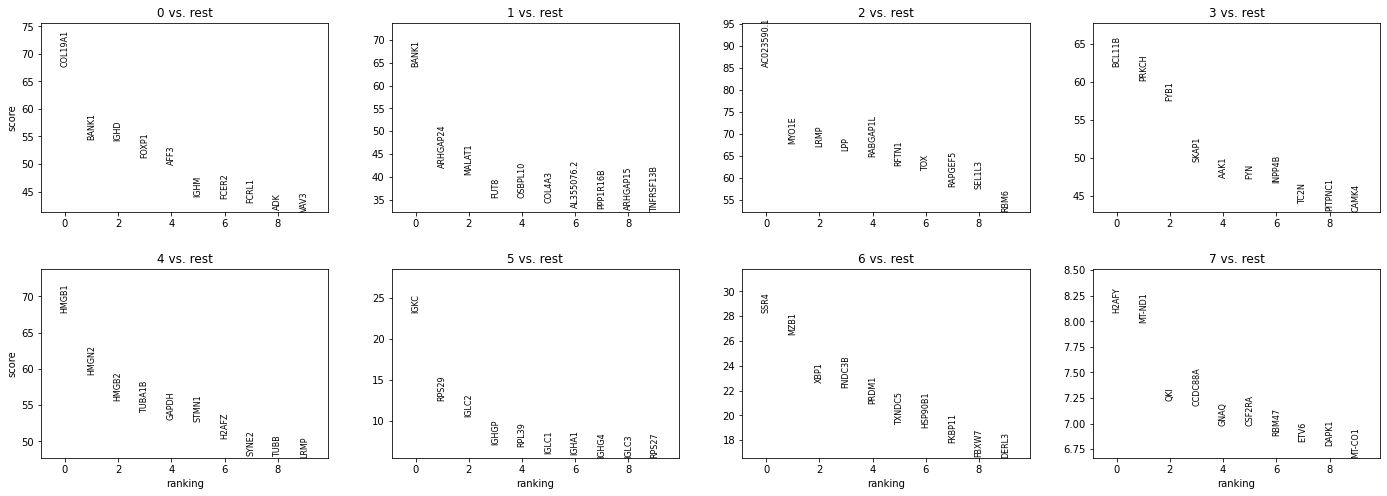

,0,1,2,3,4,5,6,7
0,COL19A1,BANK1,AC023590.1,BCL11B,HMGB1,IGKC,SSR4,H2AFY
1,BANK1,ARHGAP24,MYO1E,PRKCH,HMGN2,RPS29,MZB1,MT-ND1
2,IGHD,MALAT1,LRMP,FYB1,HMGB2,IGLC2,XBP1,QKI
3,FOXP1,FUT8,LPP,SKAP1,TUBA1B,IGHGP,FNDC3B,CCDC88A
4,AFF3,OSBPL10,RABGAP1L,AAK1,GAPDH,RPL39,PRDM1,GNAQ
5,IGHM,COL4A3,RFTN1,FYN,STMN1,IGLC1,TXNDC5,CSF2RA
6,FCER2,AL355076.2,TOX,INPP4B,H2AFZ,IGHA1,HSP90B1,RBM47
7,FCRL1,PPP1R16B,RAPGEF5,TC2N,SYNE2,IGHG4,FKBP11,ETV6
8,ADK,ARHGAP15,SEL1L3,PITPNC1,TUBB,IGLC3,FBXW7,DAPK1
9,VAV3,TNFRSF13B,RBM6,CAMK4,LRMP,RPS27,DERL3,MT-CO1


In [49]:
sc.tl.rank_genes_groups(rna, groupby= "leiden")
sc.pl.rank_genes_groups(rna, n_genes=10, sharey=False)
pd.DataFrame(rna.uns['rank_genes_groups']['names']).head(10)

In [50]:
# dotplot
# marker gene groups: 
#
marker_genes_dict = {
    'Dendritic cell': ['ITGAX', 'CST3'], # complete
    'LZ': ['CD83'], # complete, maybe add another later
    'DZ': ['AICDA'], # also complete, excluded: 'CXCR4'
    # completely exluded 'Other': ['CD74'],  what to put here? possibly CD74?
    'Plasma cell': ['JCHAIN'], # complete, , excluded: , 'CD27',)'SLAMF7' could potentially be included, is stable
    'T cell': ['CD3D', 'CD247'], # complete
}



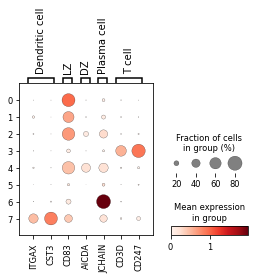

In [51]:
sc.pl.dotplot(rna, marker_genes_dict, 'leiden') # groups can be replicated:

In [52]:
# from dotplot: 
# groups 0 and 1 are LZ1 and LZ2 respectively
# groups 2 and 4 are DZ2 and DZ1 respectively
# group 6 is plasma cells
# group 7 is dendritic cells
# group 3 is T cells
# group 5 is other/unknown/apoptotic 
rna



AnnData object with n_obs × n_vars = 10153 × 7166
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batchname', 'S_score', 'G2M_score', 'phase', 'cellcycle', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'cellcycle_colors', 'batchname_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [53]:
# create a dictionary to map cluster to annotation label
leiden2annotation = {
     '0': 'LZ1',
     '1': 'LZ2',
     '5': 'unknown',
     '2': 'DZ2',
     '3': 'T cell',
     '4': 'DZ1', # might actually be apoptotic cells or low quality cells
     '6': 'Plasma cell',
     '7': 'Dendritic cell',
     # order here does not affect order on plot
}

# add a new `.obs` column called `cell_type` by mapping clusters to annotation using pandas `map` function
rna.obs['celltype'] = rna.obs['leiden'].map(leiden2annotation).astype('category')



In [55]:
rna.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,batchname,S_score,G2M_score,phase,cellcycle,leiden,celltype
AAACAGCCAAGATTCT-3,3601,3601,17367.0,399.0,2.297461,3,-0.049390,-0.002261,G1,G1,6,Plasma cell
AAACAGCCAATATACC-3,1529,1529,2957.0,192.0,6.493067,3,-0.024301,-0.044077,G1,G1,0,LZ1
AAACAGCCAGTACCGT-3,2004,2001,3741.0,192.0,5.132318,3,0.039835,-0.047578,S,S,3,T cell
AAACAGCCATTGTGGC-1,3931,3928,15317.0,597.0,3.897630,1,-0.060403,-0.014649,G1,G1,6,Plasma cell
AAACATGCAACGTGCT-4,1283,1283,2135.0,93.0,4.355972,4,0.017995,-0.001864,S,S,1,LZ2
...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTTCGCTAAAC-1,1467,1467,2805.0,214.0,7.629233,1,-0.026132,-0.000889,G1,G1,0,LZ1
TTTGTGTTCGCTAGAT-4,1381,1381,2590.0,150.0,5.791506,4,-0.021209,-0.030474,G1,G1,0,LZ1
TTTGTTGGTAACCTAG-3,2035,2034,4144.0,139.0,3.354247,3,-0.058964,0.044091,G2M,G2M,3,T cell
TTTGTTGGTCGCAATA-3,1897,1895,3836.0,87.0,2.267987,3,-0.061067,-0.071183,G1,G1,0,LZ1


In [60]:
# rna part done!
#mdata
mdata.update()

In [61]:
mdata

MuData object with n_obs × n_vars = 11770 × 141178
  var:	'feature_types', 'gene_ids', 'genome', 'interval'
  2 modalities
    rna:	11770 x 25577
      obs:	'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
      var:	'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    atac:	11770 x 115601
      var:	'gene_ids', 'feature_types', 'genome', 'interval'
      uns:	'atac', 'files'

In [57]:
mdata.write("/corgi/filippe/mudatas/mltomebcellsrnadone.h5mu")

... storing 'feature_types' as categorical
... storing 'genome' as categorical
... storing 'interval' as categorical
... storing 'feature_types' as categorical
... storing 'genome' as categorical


In [4]:
wdata = mu.read('/corgi/filippe/mudatas/mltomebcellsrnadone.h5mu')

In [5]:
wdata

MuData object with n_obs × n_vars = 11770 × 141178
  var:	'feature_types', 'gene_ids', 'genome', 'interval'
  2 modalities
    atac:	11770 x 115601
      var:	'gene_ids', 'feature_types', 'genome', 'interval'
      uns:	'atac', 'files'
    rna:	11770 x 25577
      obs:	'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
      var:	'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [10]:
mdata = wdata

In [62]:
rna

AnnData object with n_obs × n_vars = 10153 × 7166
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batchname', 'S_score', 'G2M_score', 'phase', 'cellcycle', 'leiden', 'celltype'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'cellcycle_colors', 'batchname_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [63]:
# perhaps worth saving the rna modality as an adata object: 
rna.write('/corgi/filippe/mudatas/mltonlyrna.h5ad')


In [6]:
import anndata as ad
nrna = ad.read('/corgi/filippe/mudatas/mltonlyrna.h5ad', backed='r')
# contains all of the annotations

In [60]:
nrna

AnnData object with n_obs × n_vars = 10153 × 7166 backed at '/corgi/filippe/mudatas/mltonlyrna.h5ad'
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batchname', 'S_score', 'G2M_score', 'phase', 'cellcycle', 'leiden', 'celltype'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'batchname_colors', 'cellcycle_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [11]:
mdata

MuData object with n_obs × n_vars = 11770 × 141178
  var:	'feature_types', 'gene_ids', 'genome', 'interval'
  2 modalities
    atac:	11770 x 115601
      var:	'gene_ids', 'feature_types', 'genome', 'interval'
      uns:	'atac', 'files'
    rna:	11770 x 25577
      obs:	'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
      var:	'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [ ]:
# rna part completed. 

In [ ]:
# now working on atac part: 

In [5]:
# Import a module with ATAC-seq-related functions
from muon import atac as ac

In [12]:
atac = mdata.mod['atac']
atac  # an AnnData object

AnnData object with n_obs × n_vars = 11770 × 115601
    var: 'gene_ids', 'feature_types', 'genome', 'interval'
    uns: 'atac', 'files'

In [13]:
sc.pp.calculate_qc_metrics(atac, percent_top=None, log1p=False, inplace=True)

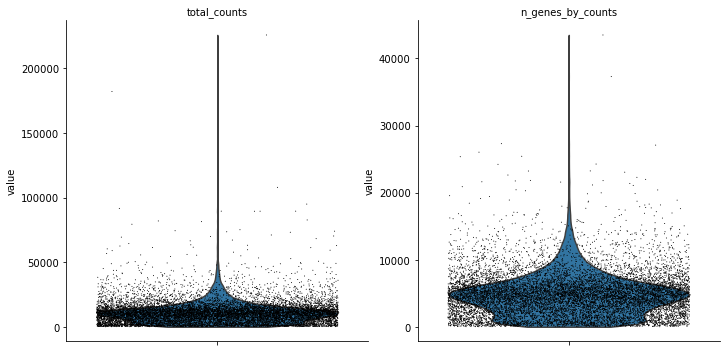

In [14]:
sc.pl.violin(atac, ['total_counts', 'n_genes_by_counts'], jitter=0.4, multi_panel=True)

In [15]:
sc.pp.filter_cells(atac, min_genes=20)  #lower than usual
sc.pp.filter_genes(atac, min_cells=3)

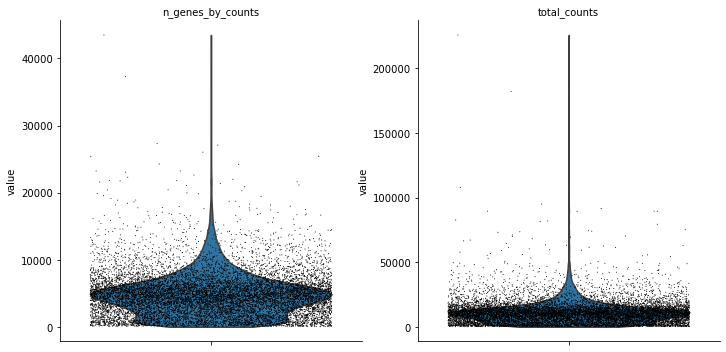

In [16]:
sc.pl.violin(atac, ['n_genes_by_counts', 'total_counts'], jitter=0.4, multi_panel=True)

In [17]:
# this is pretty good filter:

mu.pp.filter_obs(atac, 'n_genes_by_counts', lambda x: (x <= 15000))
# This is analogous to
#   sc.pp.filter_cells(atac, max_genes=15000)
#   sc.pp.filter_cells(atac, min_genes=2000)
# but does in-place filtering avoiding copying the object

mu.pp.filter_obs(atac, 'total_counts', lambda x: (x <= 40000))

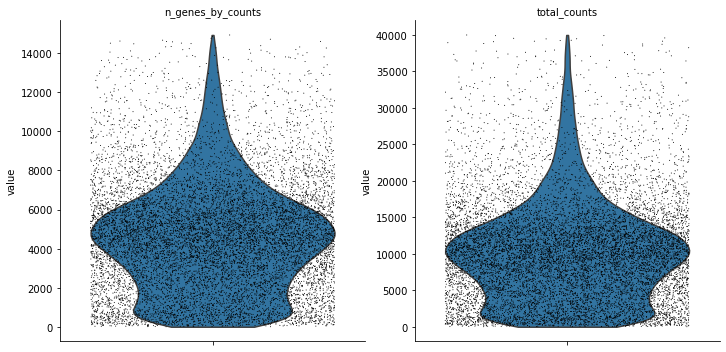

In [18]:
sc.pl.violin(atac, ['n_genes_by_counts', 'total_counts'], jitter=0.4, multi_panel=True)

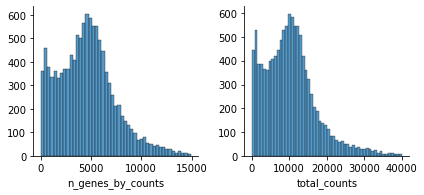

In [19]:
mu.pl.histogram(atac, ['n_genes_by_counts', 'total_counts'])

In [20]:
atac.obs['NS']=1

Fetching Regions...: 100%|██████████| 1/1 [00:01<00:00,  1.01s/it]


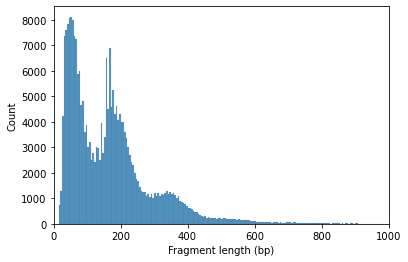

In [21]:
ac.pl.fragment_histogram(atac, region='chr1:1-2000000') # expected pattern of the graph

In [22]:
ac.tl.nucleosome_signal(atac, n=1e6)

Reading Fragments: 100%|██████████| 1000000/1000000 [00:02<00:00, 366295.57it/s]


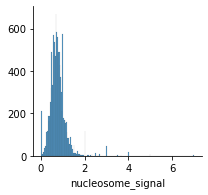

In [23]:
mu.pl.histogram(atac, "nucleosome_signal", kde=False)

In [24]:
# tss enrichment:

ac.tl.get_gene_annotation_from_rna(mdata['rna']).head(3)  
# accepts MuData with 'rna' modality or mdata['rna'] AnnData directly

,Chromosome,Start,End,gene_id,gene_name
AL627309.1,chr1,120931,133723,ENSG00000238009,AL627309.1
AL627309.5,chr1,149706,173862,ENSG00000241860,AL627309.5
AL627309.4,chr1,160445,160446,ENSG00000241599,AL627309.4


In [25]:

tss = ac.tl.tss_enrichment(mdata, n_tss=1000) 
# by default, features=ac.tl.get_gene_annotation_from_rna(mdata)

Fetching Regions...: 100%|██████████| 1000/1000 [00:30<00:00, 33.16it/s]


In [26]:
tss

AnnData object with n_obs × n_vars = 11643 × 2001
    obs: 'n_genes_by_counts', 'total_counts', 'n_genes', 'NS', 'nucleosome_signal', 'tss_score'
    var: 'TSS_position'

In [27]:
atac

AnnData object with n_obs × n_vars = 11643 × 115593
    obs: 'n_genes_by_counts', 'total_counts', 'n_genes', 'NS', 'nucleosome_signal', 'tss_score'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    uns: 'atac', 'files'

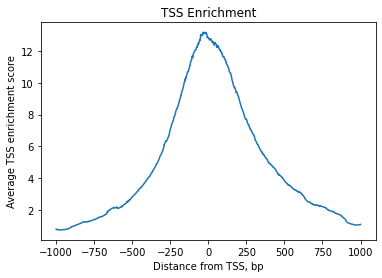

In [28]:
ac.pl.tss_enrichment(tss) # normally distributed

In [29]:
# Save original counts
atac.layers["counts"] = atac.X


In [30]:
#ac.pp.tfidf(atac, scale_factor=1e4)

In [31]:
sc.pp.normalize_per_cell(atac, counts_per_cell_after=1e4)
sc.pp.log1p(atac)


In [32]:
# may need to add batchname
#sc.pp.highly_variable_genes(rna, min_mean=0.0125, max_mean=3, min_disp=0.2, batch_key="batchname")
#sc.pl.highly_variable_genes(rna)

# create batchlist for partly preprocessed rna adata: 
batchlist = []

for i in atac.obs_names: 
    batchlist.append(i[-1])
    
print(len(batchlist))

11643


In [33]:
#batchlist

In [34]:
atac.obs['batchname'] = batchlist

In [35]:
atac.obs

,n_genes_by_counts,total_counts,n_genes,NS,nucleosome_signal,tss_score,n_counts,batchname
AAACAGCCAAGATTCT-3,10485,25725.0,10485,1,0.907895,4.333368,25725.0,3
AAACAGCCAATATACC-3,4751,10339.0,4751,1,0.652174,11.180563,10339.0,3
AAACAGCCAGTACCGT-3,5675,13006.0,5675,1,0.765957,10.055111,13006.0,3
AAACAGCCATTGTGGC-1,8478,18211.0,8478,1,0.638889,3.240897,18211.0,1
AAACATGCAACGTGCT-4,3977,8851.0,3977,1,0.535714,5.424772,8851.0,4
...,...,...,...,...,...,...,...,...
TTTGTGTTCGCTAGAT-4,2733,5892.0,2733,1,0.560000,16.081582,5892.0,4
TTTGTTGGTAACCTAG-3,3535,7682.0,3535,1,0.600000,4.414157,7682.0,3
TTTGTTGGTCGCAATA-3,6896,15055.0,6896,1,0.660000,5.290213,15055.0,3
TTTGTTGGTGGGAACA-2,3184,7193.0,3184,1,0.809524,6.841271,7193.0,2


In [36]:
sc.pp.highly_variable_genes(atac, min_mean=0.05, max_mean=1.5, min_disp=.5, batch_key="batchname")

... storing 'batchname' as categorical


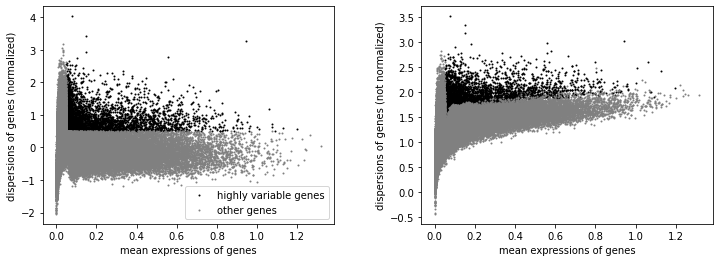

In [37]:
sc.pl.highly_variable_genes(atac)

In [38]:
np.sum(atac.var.highly_variable)

5465

In [39]:
atac.raw = atac

In [40]:
sc.pp.scale(atac)
sc.tl.pca(atac)

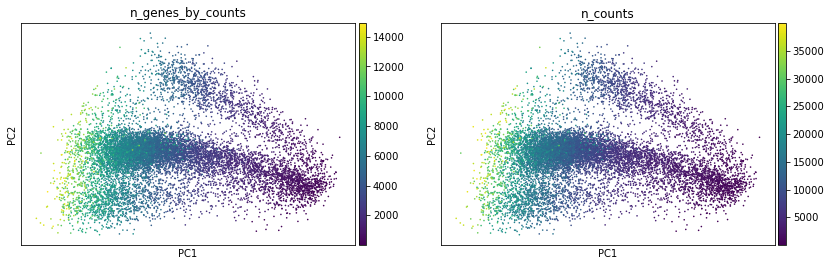

In [41]:
sc.pl.pca(atac, color=["n_genes_by_counts", "n_counts"])


In [42]:
atac.uns['atac']['peak_annotation'].tail()

# Alternatively add peak annotation from a TSV file
# ac.tl.add_peak_annotation(atac, annotation="data/pbmc10k/atac_peak_annotation.tsv")


,peak,distance,peak_type
gene_name,,,
AC240274.1,KI270711.1:22576-23421,1229,distal
AC213203.2,KI270713.1:3917-4818,27710,distal
AC213203.2,KI270713.1:21430-22329,10199,distal
AC213203.2,KI270713.1:29673-30443,2085,distal
AC213203.1,KI270713.1:36924-37828,1518,distal


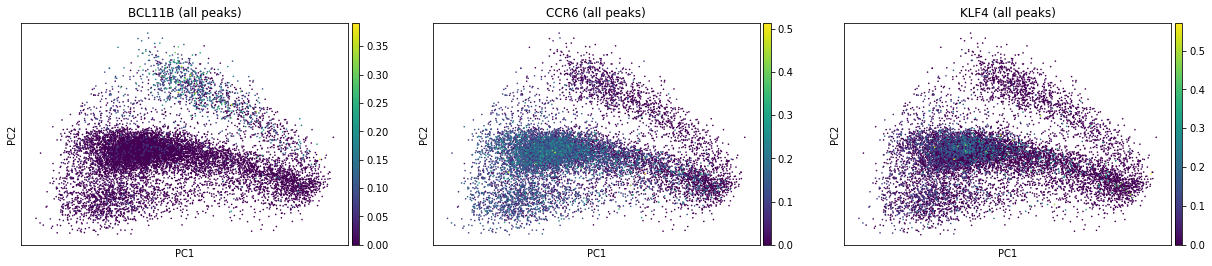

In [43]:
ac.pl.pca(atac, color=["BCL11B", "CCR6", "KLF4"], average="total")


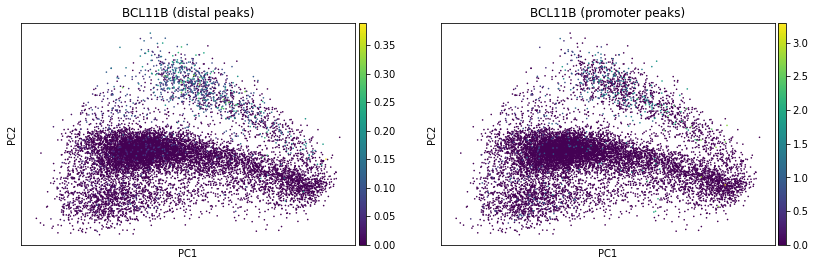

In [44]:
ac.pl.pca(atac, color="BCL11B", average="peak_type")

In [ ]:
# sc.pp.neighbors(atac, n_neighbors=10, n_pcs=40) may be skipped

In [45]:
# takes care of batch effects
sc.tl.pca(atac, svd_solver='arpack')
if True:
    import bbknn
    bbknn.bbknn(atac, batch_key='batchname')
else:
    sc.pp.neighbors(atac, n_neighbors=10, n_pcs=40)
sc.tl.umap(atac)

In [46]:
atac

AnnData object with n_obs × n_vars = 11643 × 115593
    obs: 'n_genes_by_counts', 'total_counts', 'n_genes', 'NS', 'nucleosome_signal', 'tss_score', 'n_counts', 'batchname'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'atac', 'files', 'log1p', 'hvg', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [ ]:
# sc.tl.leiden(atac, resolution=.5)

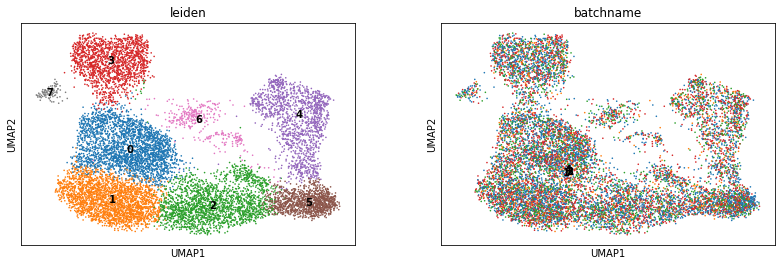

In [47]:
# regresses out dataset:
#sc.tl.leiden(adata, resolution=0.2)  #to get the big groups
sc.tl.leiden(atac, resolution=0.5) # seems resolution 0.5 is good for replicating results!
sc.pl.umap(atac, color=["leiden", "batchname"],ncols=2,legend_loc="on data")
# at least batch correction is good.

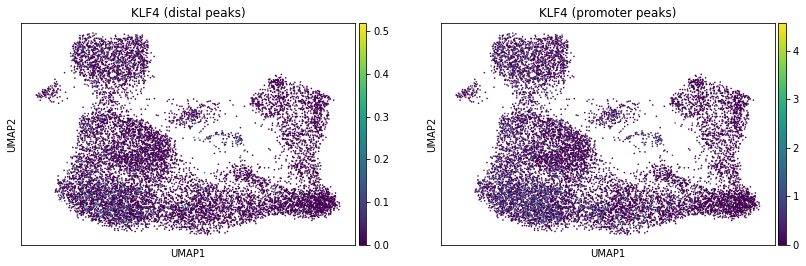

In [48]:
ac.pl.umap(atac, color=["KLF4"], average="peak_type")

In [49]:
ac.tl.rank_peaks_groups(atac, 'leiden', method='t-test') # perhaps worth trying with other method?

In [50]:
result = atac.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.set_option("max_columns", 50)
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'genes', 'pvals']}).head(10)

,0_n,0_g,0_p,1_n,1_g,1_p,2_n,2_g,2_p,3_n,3_g,3_p,4_n,4_g,4_p,5_n,5_g,5_p,6_n,6_g,6_p,7_n,7_g,7_p
0,chr1:159076606-159077499,AIM2,5.561269e-80,chr19:56477314-56478227,"ZNF667, ZNF667-AS1",7.741445e-102,chr9:127396502-127397411,SLC2A8,0.000005,chr1:38152231-38153168,AL390839.1,3.375085e-150,chr10:8332028-8332935,AL390835.1,6.525147e-65,chr16:56978521-56979393,"NLRC5, CETP",0.049301,chr3:93470139-93471051,,2.264575e-29,chr5:1315838-1316543,TERT,3.747967e-12
1,chr16:8891260-8892178,"USP7, LITAFD",4.648733e-80,chr19:56507345-56508223,ZNF471,2.911708e-90,chr19:50328872-50329789,KCNC3,0.000015,chr16:49281649-49282522,"CBLN1, AC007614.1",2.670292e-139,chr14:101721781-101722709,"LINC00239, LINC02320",9.890313e-59,chr8:60329973-60330880,"CA8, LINC01301",0.051199,chr14:77039964-77040898,LINC02288,1.862299e-15,chr19:16896813-16897681,"F2RL3, CPAMD8",8.679769e-12
2,chr20:45419267-45420178,PIGT,4.585241e-73,chr14:105817761-105818650,IGHD,9.182043e-69,chr16:22190417-22191249,"SDR42E2, AC009019.2",0.000267,chr8:102534288-102535215,AP002852.1,2.034490e-133,chr7:138752292-138753202,ATP6V0A4,1.357890e-58,chr19:38945031-38945796,"FBXO17, ERVK9-11",0.091475,chr14:102086711-102087602,HSP90AA1,1.367964e-14,chr4:120749224-120750135,"PRDM5, AC025741.1",2.303732e-11
3,chr5:156402220-156403145,SGCD,1.437063e-66,chr4:38663419-38664330,"KLF3, KLF3-AS1",2.301762e-63,chr19:48363786-48364698,"TMEM143, SYNGR4",0.000431,chr14:106691465-106692365,IGHVIII-67-3,2.603816e-126,chr2:109031426-109032363,EDAR,3.342198e-53,chr8:86784953-86785850,AC090572.2,0.108962,chr17:78359897-78360667,"SOCS3, AC061992.2",1.532143e-14,chr1:157523780-157524665,FCRL5,3.859269e-11
4,chr19:6521746-6522629,TNFSF9,1.260456e-58,chr14:58637422-58638290,DACT1,2.427460e-58,chr19:6424675-6425584,KHSRP,0.000615,chr20:64285519-64286435,"LINC00266-1, PCMTD2",2.348168e-123,chr11:48001277-48002193,"PTPRJ, PTPRJ-AS1",1.992249e-50,chr9:26669564-26670432,AL451137.2,0.110272,chr2:28392306-28393088,"FOSL2, AC104695.2",1.624441e-14,chr22:17257786-17258672,CECR3,3.915903e-11
5,chr11:107927915-107928801,"RAB39A, SLC35F2",1.666087e-57,chr4:155758542-155759435,GUCY1B1,4.737816e-56,chr19:50415448-50416218,"SPIB, POLD1",0.000702,chr9:33871307-33872162,UBE2R2,2.189876e-119,chr11:60985925-60986812,CD6,6.208940e-50,chr10:110361721-110362214,SMNDC1,0.114055,chr19:43463170-43463979,LYPD3,2.167393e-14,chr1:154860229-154860974,KCNN3,8.780457e-11
6,chr6:113854626-113855550,MARCKS,1.801738e-54,chr8:19013377-19014256,PSD3,4.356437e-56,chr19:680243-681221,FSTL3,0.001460,chr7:74100788-74101728,LIMK1,3.269426e-117,chr6:158653316-158654226,SYTL3,1.048255e-47,chr3:179329985-179330794,ZNF639,0.133599,chr11:65422171-65422838,NEAT1,5.278088e-14,chr7:55964191-55965039,NIPSNAP2,1.036164e-10
7,chr1:207822194-207823096,MIR29B2CHG,9.416613e-52,chr14:56117825-56118740,"PELI2, AL138995.1",3.206748e-55,chr11:14237324-14238235,"SPON1-AS1, SPON1",0.003689,chr16:10981604-10982482,CLEC16A,3.359367e-111,chr15:69468211-69469149,DRAIC,1.960065e-47,chr15:74742322-74743210,CYP1A2,0.133894,chr21:45642914-45643855,PCBP3,5.061461e-14,chr2:240584498-240585446,CAPN10-DT,1.091723e-10
8,chr2:16712792-16713702,AC008164.1,2.722205e-51,chr11:114179039-114179945,"ZBTB16, AP002755.1",3.665515e-54,chr14:105817761-105818650,IGHD,0.004482,chr5:137072241-137073122,SPOCK1,1.343815e-110,chr22:25067920-25068816,KIAA1671,4.249849e-46,GL000194.1:27926-28825,AC145212.1,0.141327,chr2:109613704-109614640,"SOWAHC, SEPTIN10",7.435869e-14,chr6:26360503-26361432,BTN3A2,3.805005e-10
9,chr6:52497479-52498313,"EFHC1, TRAM2",2.459884e-51,chr12:92444829-92445684,CLLU1OS,2.367817e-53,chr19:9818887-9819804,FBXL12,0.004842,chr9:34097913-34098746,"DCAF12, AL354989.1",2.297634e-108,chr11:85752597-85753517,SYTL2,9.423424e-46,chr11:100719248-100720175,"ARHGAP42, AP001351.1",0.147678,chr2:38602780-38603703,HNRNPLL,1.156967e-13,chr6:105757459-105758402,"LINC02836, AL591518.1",4.369336e-10


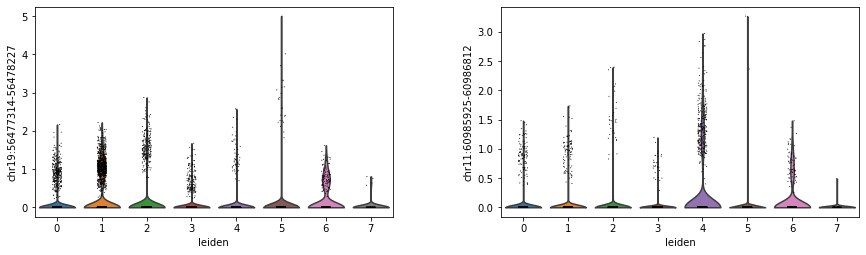

In [51]:
sc.pl.violin(atac, ['chr19:56477314-56478227', 'chr11:60985925-60986812'], groupby='leiden')

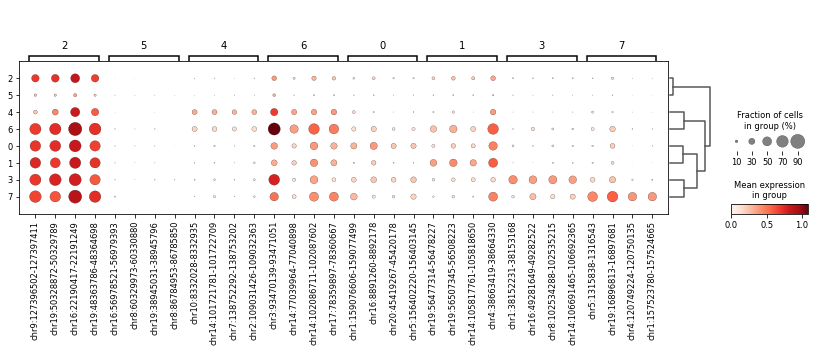

In [52]:
sc.pl.rank_genes_groups_dotplot(atac, groupby= "leiden", n_genes=4)

In [ ]:
# perhaps cluster 4 is unknown/apoptotic?
# hmmm, generally low fraction of cells expressed in each group
# for group 5, perhaps it is a constitutively open chromatin region!

In [ ]:
# need to check total counts and other stuff for each group to determine quality of each group

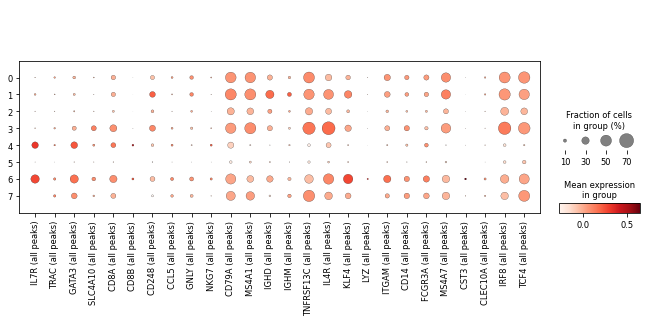

In [53]:
# random marker genes: 
mrkr_genes = ['IL7R', 'TRAC',
                'GATA3',
                'SLC4A10',
                'CD8A', 'CD8B', 'CD248', 'CCL5',
                'GNLY', 'NKG7',
                'CD79A', 'MS4A1', 'IGHD', 'IGHM', 'TNFRSF13C',
                'IL4R', 'KLF4', 'LYZ', 'ITGAM', 'CD14',
                'FCGR3A', 'MS4A7', 'CST3',
                'CLEC10A', 'IRF8', 'TCF4']

ac.pl.dotplot(atac, mrkr_genes, groupby='leiden')

In [ ]:
# 6 may be dendritic cells

In [54]:
atac

AnnData object with n_obs × n_vars = 11643 × 115593
    obs: 'n_genes_by_counts', 'total_counts', 'n_genes', 'NS', 'nucleosome_signal', 'tss_score', 'n_counts', 'batchname', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'atac', 'files', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'batchname_colors', 'rank_genes_groups', 'dendrogram_leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [55]:
# saving the anndata object: 
# perhaps worth saving the atac modality as an adata object: 
#atac.write('/corgi/filippe/mudatas/mltonlyatac.h5ad')


In [7]:
import anndata as ad
nrna = ad.read('/corgi/filippe/mudatas/mltonlyrna.h5ad', backed=False)
# contains all of the annotations

In [8]:
import anndata as ad
natac = ad.read('/corgi/filippe/mudatas/mltonlyatac.h5ad', backed=False)
# contains all of the annotations

In [44]:
natac

AnnData object with n_obs × n_vars = 11643 × 115593
    obs: 'n_genes_by_counts', 'total_counts', 'n_genes', 'NS', 'nucleosome_signal', 'tss_score', 'n_counts', 'batchname', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'atac', 'batchname_colors', 'dendrogram_leiden', 'files', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [9]:
atac = natac

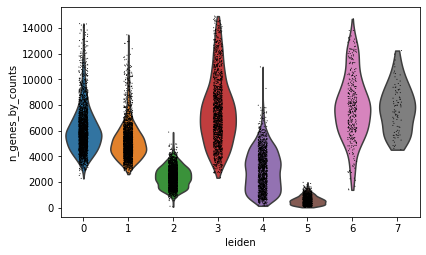

In [58]:
sc.pl.violin(atac, ['n_genes_by_counts'], groupby='leiden')

In [ ]:
# Proceed to integrate the atac and rna: 

In [45]:
nrna

AnnData object with n_obs × n_vars = 10153 × 7166
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batchname', 'S_score', 'G2M_score', 'phase', 'cellcycle', 'leiden', 'celltype'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'batchname_colors', 'cellcycle_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [61]:
natac

AnnData object with n_obs × n_vars = 11643 × 115593 backed at '/corgi/filippe/mudatas/mltonlyatac.h5ad'
    obs: 'n_genes_by_counts', 'total_counts', 'n_genes', 'NS', 'nucleosome_signal', 'tss_score', 'n_counts', 'batchname', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'atac', 'batchname_colors', 'dendrogram_leiden', 'files', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [64]:
# put all the changes into one object: 
radata = mu.MuData({'rna': nrna, 'atac': natac})

In [23]:
#radata # success

In [24]:
#mu.pp.intersect_obs(radata)

In [68]:
#radata.update

<bound method MuData.update of MuData object with n_obs × n_vars = 11762 × 122759
  var:	'dispersions', 'dispersions_norm', 'feature_types', 'gene_ids', 'genome', 'highly_variable', 'highly_variable_intersection', 'highly_variable_nbatches', 'interval', 'mean', 'mean_counts', 'means', 'n_cells', 'n_cells_by_counts', 'pct_dropout_by_counts', 'std', 'total_counts'
  2 modalities
    rna:	10034 x 7166
      obs:	'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batchname', 'S_score', 'G2M_score', 'phase', 'cellcycle', 'leiden', 'celltype'
      var:	'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
      uns:	'batchname_colors', 'cellcycle_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'uma

In [46]:
mdata = mu.read_10x_h5(os.path.join(data_dir, "filtered_feature_bc_matrix.h5"))
mdata.var_names_make_unique()
mdata # seems to work

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Added `interval` annotation for features from /corgi/filippe/libsall/AGG1/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Added peak annotation from /corgi/filippe/libsall/AGG1/outs/atac_peak_annotation.tsv to .uns['atac']['peak_annotation']
Added gene names to peak annotation in .uns['atac']['peak_annotation']
Located fragments file: /corgi/filippe/libsall/AGG1/outs/atac_fragments.tsv.gz


MuData object with n_obs × n_vars = 11770 × 152202
  var:	'feature_types', 'gene_ids', 'genome', 'interval'
  2 modalities
    rna:	11770 x 36601
      var:	'gene_ids', 'feature_types', 'genome', 'interval'
    atac:	11770 x 115601
      var:	'gene_ids', 'feature_types', 'genome', 'interval'
      uns:	'atac', 'files'

In [11]:
mdata['rna'].raw.X

AttributeError: 'NoneType' object has no attribute 'X'

In [47]:
mdata.mod['rna'] = nrna

In [104]:
#nrna.raw = nrna

In [48]:
mdata.mod['atac'] = natac

In [106]:
#natac.raw = natac

In [49]:
mdata

MuData object with n_obs × n_vars = 11770 × 152202
  var:	'feature_types', 'gene_ids', 'genome', 'interval'
  2 modalities
    rna:	10153 x 7166
      obs:	'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batchname', 'S_score', 'G2M_score', 'phase', 'cellcycle', 'leiden', 'celltype'
      var:	'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
      uns:	'batchname_colors', 'cellcycle_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      obsp:	'connectivities', 'distances'
    atac:	11643 x 115593
      obs:	'n_genes_by_counts', 'total_counts', 'n_genes', 'NS', 'nucleosome_signal', 'tss_score', 'n_counts', 'batchname', 'leiden'
      var:	'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
      uns:	'atac', 'batchname_colors', 'dendrogram_leiden', 'files', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'counts'
      obsp:	'connectivities', 'distances'

In [93]:
mdata.obs

""
AAACAGCCAAGATTCT-3
AAACAGCCAATATACC-3
AAACAGCCAGTACCGT-3
AAACAGCCATTGTGGC-1
AAACATGCAACGTGCT-4
...
TTTGTGTTCGCTAGAT-4
TTTGTTGGTAACCTAG-3
TTTGTTGGTCGCAATA-3
TTTGTTGGTGGGAACA-2


In [50]:
mu.pp.intersect_obs(mdata) # requires that adata modalities can not be backed

In [52]:
mdata.update()

In [53]:
mdata

MuData object with n_obs × n_vars = 10034 × 122759
  var:	'dispersions', 'dispersions_norm', 'feature_types', 'gene_ids', 'genome', 'highly_variable', 'highly_variable_intersection', 'highly_variable_nbatches', 'interval', 'mean', 'mean_counts', 'means', 'n_cells', 'n_cells_by_counts', 'pct_dropout_by_counts', 'std', 'total_counts'
  2 modalities
    rna:	10034 x 7166
      obs:	'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batchname', 'S_score', 'G2M_score', 'phase', 'cellcycle', 'leiden', 'celltype'
      var:	'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
      uns:	'batchname_colors', 'cellcycle_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      obsp:	'connectivities', 'distances'
    atac:	10034 x 115593
      obs:	'n_genes_by_counts', 'total_counts', 'n_genes', 'NS', 'nucleosome_signal', 'tss_score', 'n_counts', 'batchname', 'leiden'
      var:	'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
      uns:	'atac', 'batchname_colors', 'dendrogram_leiden', 'files', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'counts'
      obsp:	'connectivities', 'distances'

In [41]:
#??mu.pp.intersect_obs

In [54]:
#nrna.raw.X[1, 1] 

In [55]:
#nrna.raw

In [56]:
#natac.raw.X

In [123]:
#mdata.mod['rna'].raw

In [57]:
#print(mdata.mod['atac'].raw)

In [ ]:
# rna and atac integration: 

In [ ]:
#mu.pp.intersect_obs(mdata) # requires that adata modalities can not be backed

In [58]:
mdata

MuData object with n_obs × n_vars = 10034 × 122759
  var:	'dispersions', 'dispersions_norm', 'feature_types', 'gene_ids', 'genome', 'highly_variable', 'highly_variable_intersection', 'highly_variable_nbatches', 'interval', 'mean', 'mean_counts', 'means', 'n_cells', 'n_cells_by_counts', 'pct_dropout_by_counts', 'std', 'total_counts'
  2 modalities
    rna:	10034 x 7166
      obs:	'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batchname', 'S_score', 'G2M_score', 'phase', 'cellcycle', 'leiden', 'celltype'
      var:	'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
      uns:	'batchname_colors', 'cellcycle_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      obsp:	'connectivities', 'distances'
    atac:	10034 x 115593
      obs:	'n_genes_by_counts', 'total_counts', 'n_genes', 'NS', 'nucleosome_signal', 'tss_score', 'n_counts', 'batchname', 'leiden'
      var:	'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
      uns:	'atac', 'batchname_colors', 'dendrogram_leiden', 'files', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'counts'
      obsp:	'connectivities', 'distances'

In [59]:
mdata.shape

(10034, 122759)

In [61]:
from sklearn.metrics import adjusted_rand_score as ari
ari(mdata.obs['rna:celltype'], mdata.obs['atac:leiden'])

0.44210788661742495

In [62]:
# Calculate total number of cells of respective ATAC celltypes
df_total = (
    mdata.obs.groupby("atac:leiden").
        size().
        reset_index(name="n_total").
        set_index("atac:leiden")
)

# Calculate number of cells for each pair of RNA-ATAC celltype annotation
df = (
    mdata.obs.groupby(["atac:leiden", "rna:celltype"]).
        size().
        reset_index(name="n").
        set_index("atac:leiden").
        join(df_total).
        reset_index()
)

# Calculate a fraction of cells of each RNA celltype (n)
# for each ATAC celltype (/ n_total)
df_frac = df.assign(frac = lambda x: x.n / x.n_total)


In [63]:
df_wide = df_frac.set_index("atac:leiden").pivot(columns="rna:celltype", values="frac")

<AxesSubplot:xlabel='rna:celltype', ylabel='atac:leiden'>

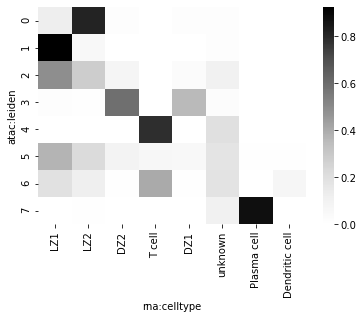

In [64]:
import seaborn as sns
sns.heatmap(df_wide, cmap="Greys") # ataconly clusters are not good!